# Explore here

In [4]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Your code here

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


Step 2: Exploration and Data Cleaning

In [6]:
# Obtain dimensions of dataframe
# (# rows, # coluns
total_data.shape

(3140, 108)

In [7]:
total_data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [8]:
total_data.iloc[1]

fips                           1003
TOT_POP                      218022
0-9                           24757
0-9 y/o % of total pop    11.355276
19-Oct                        26913
                            ...    
CKD_prevalence                  3.2
CKD_Lower 95% CI                3.0
CKD_Upper 95% CI                3.5
CKD_number                     5479
Urban_rural_code                  4
Name: 1, Length: 108, dtype: object

In [9]:
#Total info in my data
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [10]:
total_data.isnull().sum(axis=0)

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

Eliminate duplicates & Irrelevtion information

In [11]:
#Eliminate duplicates
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (3140, 108)
Dimensions after dropping duplicates: (3140, 108)


In [12]:
import numpy as np


In [13]:
print(total_data.dtypes)  # Check data types of all columns

# Keep only numeric columns for correlation analysis
numeric_data = total_data.select_dtypes(include=[np.number])

# Try computing correlation again
print(numeric_data.corr())


fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object
                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218

In [14]:
print(total_data.describe())



               fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.

In [15]:
print(total_data.nunique())

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64


In [16]:
print(total_data.isnull())

       fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0     False    False  False                   False   False   
1     False    False  False                   False   False   
2     False    False  False                   False   False   
3     False    False  False                   False   False   
4     False    False  False                   False   False   
...     ...      ...    ...                     ...     ...   
3135  False    False  False                   False   False   
3136  False    False  False                   False   False   
3137  False    False  False                   False   False   
3138  False    False  False                   False   False   
3139  False    False  False                   False   False   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                        False  False                     False  False   
1                        False  False                     False  False   
2                    

In [17]:
# Attempt to convert all columns to numeric, coercing errors to NaN
total_data = total_data.apply(pd.to_numeric, errors='coerce')


In [18]:
print(total_data.corr())

                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   

                          19-Oct  10-19

In [19]:
# Simple NaN handling for demonstration
total_data_filled = total_data.fillna(0)
print(total_data_filled.corr())


                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   

                          19-Oct  10-19

In [20]:
#Eliminate irrelevant columns
columns_to_remove = ["fips", "0-9", "19-Oct", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "TOT_POP", "Urban_rural_code", "CKD_number", "CKD_prevalence", "diabetes_prevalence", "COPD_number"]

for column in columns_to_remove:
    try:
        total_data = total_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")

total_data.head(5)

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,White-alone pop,...,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_Lower 95% CI,CKD_Upper 95% CI
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,42660,...,8.7,3345,8.6,7.3,9.9,11.9,13.8,5462,2.9,3.3
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,190301,...,8.7,13414,8.6,7.2,10.1,11.0,13.1,20520,3.0,3.5
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,12209,...,11.8,2159,12.1,10.7,13.3,18.6,20.6,3870,4.2,4.8
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,17211,...,9.3,1533,10.0,8.8,11.3,13.2,14.9,2511,3.1,3.6
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,55456,...,10.1,4101,10.5,9.1,12.0,12.6,14.5,6017,3.2,3.7


In [21]:
#Eliminate irrelevant columns
columns_to_remove = ["Heart disease_number", "COPD_prevalence"]

for column in columns_to_remove:
    try:
        total_data = total_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")

total_data.head(5)

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,White-alone pop,...,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_Lower 95% CI,CKD_Upper 95% CI
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,42660,...,7.9,7.2,8.7,7.3,9.9,11.9,13.8,5462,2.9,3.3
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,190301,...,7.8,7.0,8.7,7.2,10.1,11.0,13.1,20520,3.0,3.5
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,12209,...,11.0,10.1,11.8,10.7,13.3,18.6,20.6,3870,4.2,4.8
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,17211,...,8.6,7.9,9.3,8.8,11.3,13.2,14.9,2511,3.1,3.6
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,55456,...,9.2,8.4,10.1,9.1,12.0,12.6,14.5,6017,3.2,3.7


In [22]:
#Missing Value
missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
0-9 y/o % of total pop      0.0
10-19 y/o % of total pop    0.0
20-29 y/o % of total pop    0.0
30-39 y/o % of total pop    0.0
40-49 y/o % of total pop    0.0
                           ... 
diabetes_Lower 95% CI       0.0
diabetes_Upper 95% CI       0.0
diabetes_number             0.0
CKD_Lower 95% CI            0.0
CKD_Upper 95% CI            0.0
Length: 90, dtype: float64


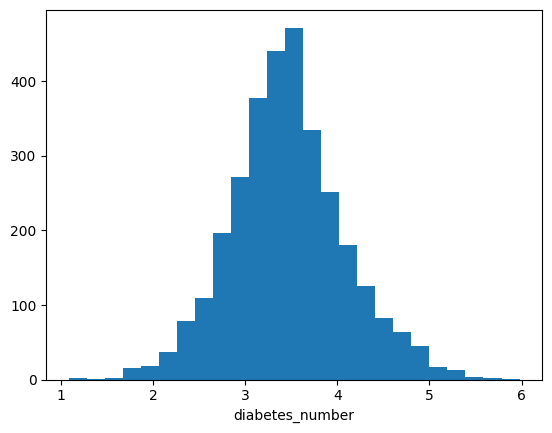

In [23]:
plt.hist(np.log10(total_data['diabetes_number']+1), bins=25)
plt.xlabel('diabetes_number')
plt.show()

In [24]:
#category
total_data.head()

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,White-alone pop,...,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_Lower 95% CI,CKD_Upper 95% CI
0,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,42660,...,7.9,7.2,8.7,7.3,9.9,11.9,13.8,5462,2.9,3.3
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,190301,...,7.8,7.0,8.7,7.2,10.1,11.0,13.1,20520,3.0,3.5
2,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,12209,...,11.0,10.1,11.8,10.7,13.3,18.6,20.6,3870,4.2,4.8
3,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,17211,...,8.6,7.9,9.3,8.8,11.3,13.2,14.9,2511,3.1,3.6
4,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,55456,...,9.2,8.4,10.1,9.1,12.0,12.6,14.5,6017,3.2,3.7


In [25]:
#Training and Testing Data
#presents all features excluding the target
X = total_data[['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop']] # A dataframe (double brackets)

# y contains our target feature
y = total_data['diabetes_Upper 95% CI'] # A series (single brackets)

In [26]:
X.head()

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop
0,12.206615,13.735364,12.370281,12.749771,13.636445,10.478229,7.284042,3.622237
1,11.355276,12.344167,10.814964,11.564429,12.539102,13.728890,9.602701,4.296814
2,10.980266,11.896628,13.134520,12.865239,12.354809,12.362847,9.018930,4.212049
3,10.964286,11.589286,13.522321,13.897321,13.562500,11.361607,7.691964,3.504464
4,12.266598,13.087828,11.656293,11.901798,12.921853,12.041840,8.525242,4.036999


In [27]:
y


0       13.8
1       13.1
2       20.6
3       14.9
4       14.5
        ... 
3135     9.6
3136     8.0
3137    11.2
3138    12.1
3139    12.7
Name: diabetes_Upper 95% CI, Length: 3140, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
nrows, ncolumns = total_data.shape

print(f"Our entire dataset has {nrows} rows.")
print(f"Our training set should have 80% of our data so it should have {int(0.8*nrows)} rows.")
print(f"Our test set should have 20% of our data so it should have {int(0.2*nrows)} rows.")

Our entire dataset has 3140 rows.
Our training set should have 80% of our data so it should have 2512 rows.
Our test set should have 20% of our data so it should have 628 rows.


In [30]:
X_train

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop
1349,10.236442,10.395947,8.782135,10.592982,10.320886,17.751923,10.151998,7.318446
2269,12.026996,12.473924,11.489004,11.696322,12.306649,12.490070,8.615623,5.237188
731,11.938867,14.297273,12.283488,11.117770,12.325442,12.361402,7.884327,4.006593
2641,12.879126,13.174621,11.446253,11.390500,11.055977,13.188559,9.029326,4.315343
3107,14.165990,14.120513,9.228520,10.384928,10.618808,14.256943,8.068865,4.963456
...,...,...,...,...,...,...,...,...
1859,11.538970,12.990435,13.768896,12.543931,11.258334,12.279535,6.945729,4.551449
892,13.763284,13.554907,9.877058,11.408627,10.220879,13.971661,8.897687,5.126068
891,13.887941,14.932096,11.690439,10.905617,10.509793,12.932505,8.032485,5.418686
975,13.264903,13.817608,9.395973,10.343466,9.474931,14.409791,8.606396,7.777339


In [31]:
y_train

1349    11.7
2269    12.8
731     13.2
2641    16.1
3107    12.4
        ... 
1859    11.7
892     14.8
891     15.1
975     14.1
279     10.3
Name: diabetes_Upper 95% CI, Length: 2512, dtype: float64

In [32]:
X_test

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop
2079,12.776904,13.575140,12.195747,11.447081,12.084644,12.629906,7.351634,3.992889
2283,10.171353,12.380394,12.155829,11.613943,12.338899,13.781488,8.167350,5.223589
1570,9.593860,11.944356,9.673809,10.665174,11.608571,14.550688,10.329389,6.347937
1264,8.932266,9.328056,7.942790,8.554466,9.507961,19.834488,12.386435,8.536476
2398,10.936662,13.019836,10.890710,10.262694,9.313012,18.932373,8.669679,3.936586
...,...,...,...,...,...,...,...,...
1280,9.920921,12.197065,17.431896,11.331108,10.389981,13.804197,7.844729,4.717662
316,10.183352,10.065595,9.766405,9.848835,9.829209,18.155055,12.947149,5.405040
2700,8.493665,18.301267,10.652276,14.312529,12.576255,11.684655,6.851244,3.237916
1330,13.264445,13.274788,11.915905,14.048606,12.804197,11.163242,6.022712,3.229257


In [33]:
y_test

2079    13.3
2283    13.2
1570    15.9
1264    16.4
2398    11.8
        ... 
1280    11.3
316     14.6
2700    12.9
1330     9.3
145     18.9
Name: diabetes_Upper 95% CI, Length: 628, dtype: float64

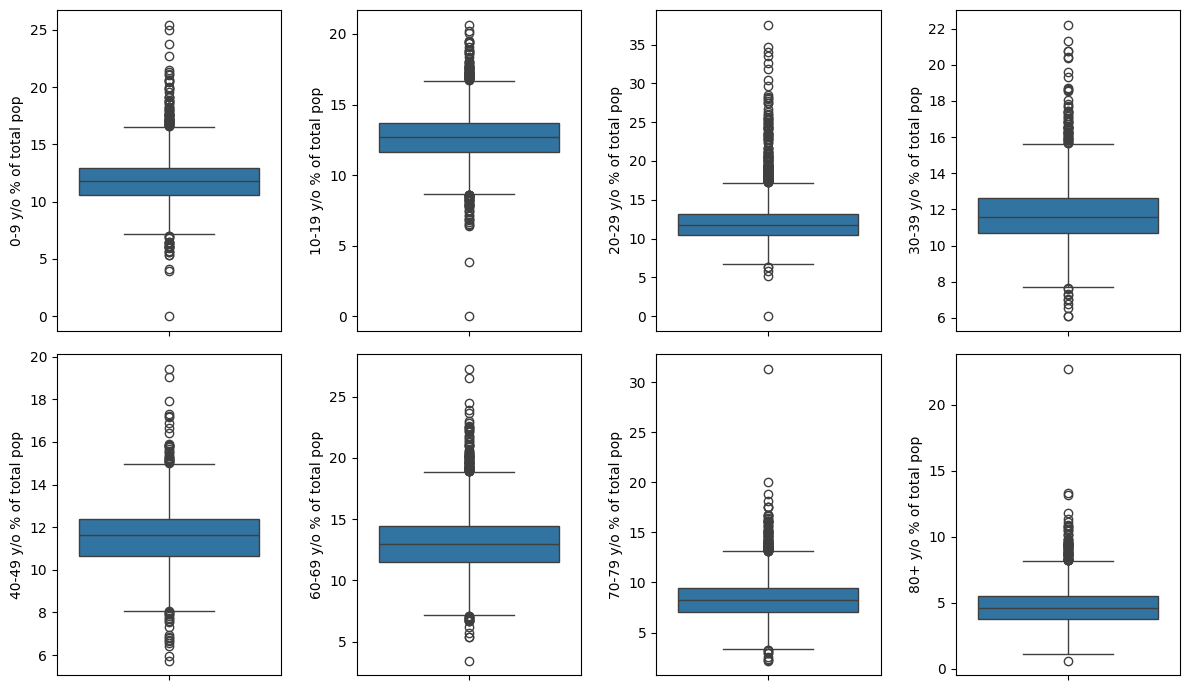

In [34]:

fig, axis = plt.subplots(2, 4, figsize = (12, 7))  


# Create boxplots 
sns.boxplot(ax=axis[0, 0], data=X_train, y="0-9 y/o % of total pop")
sns.boxplot(ax=axis[0, 1], data=X_train, y="10-19 y/o % of total pop")
sns.boxplot(ax=axis[0, 2], data=X_train, y="20-29 y/o % of total pop")
sns.boxplot(ax=axis[0, 3], data=X_train, y="30-39 y/o % of total pop")
sns.boxplot(ax=axis[1, 0], data=X_train, y="40-49 y/o % of total pop")
sns.boxplot(ax=axis[1, 1], data=X_train, y="60-69 y/o % of total pop")
sns.boxplot(ax=axis[1, 2], data=X_train, y="70-79 y/o % of total pop")
sns.boxplot(ax=axis[1, 3], data=X_train, y="80+ y/o % of total pop")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
#outlier

def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

                # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test
    

In [36]:
X_train, X_test = replace_outliers(X_train, X_test)

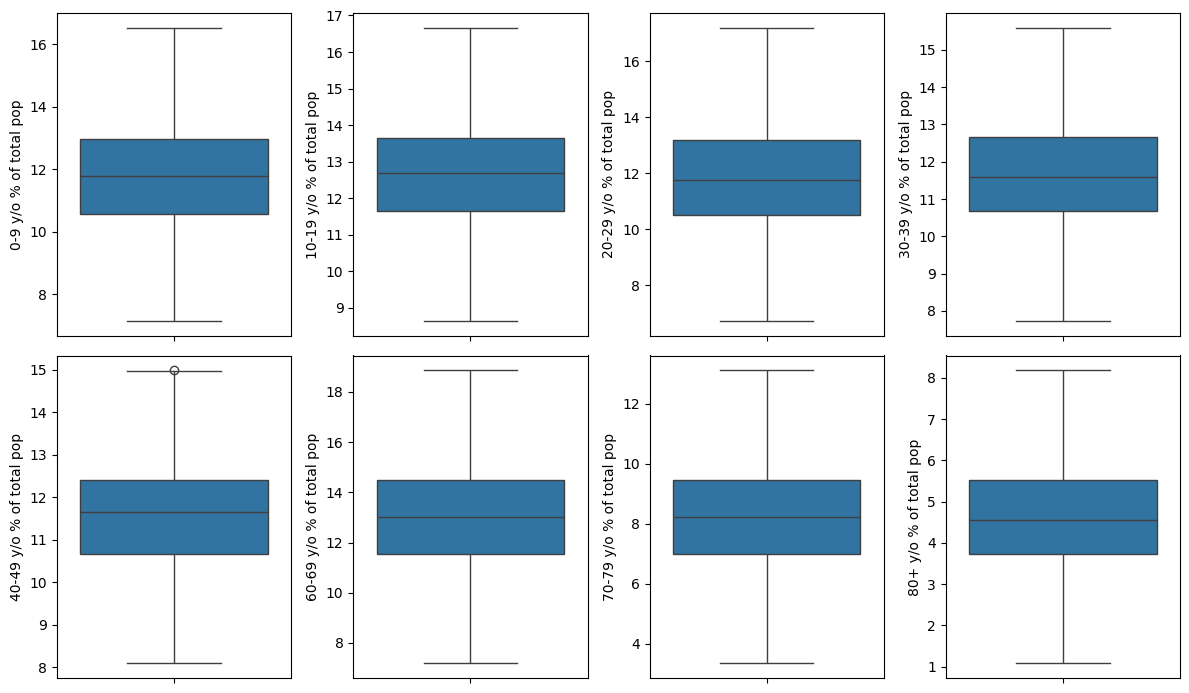

In [37]:

fig, axis = plt.subplots(2, 4, figsize = (12, 7))  


# Create boxplots 
sns.boxplot(ax=axis[0, 0], data=X_train, y="0-9 y/o % of total pop")
sns.boxplot(ax=axis[0, 1], data=X_train, y="10-19 y/o % of total pop")
sns.boxplot(ax=axis[0, 2], data=X_train, y="20-29 y/o % of total pop")
sns.boxplot(ax=axis[0, 3], data=X_train, y="30-39 y/o % of total pop")
sns.boxplot(ax=axis[1, 0], data=X_train, y="40-49 y/o % of total pop")
sns.boxplot(ax=axis[1, 1], data=X_train, y="60-69 y/o % of total pop")
sns.boxplot(ax=axis[1, 2], data=X_train, y="70-79 y/o % of total pop")
sns.boxplot(ax=axis[1, 3], data=X_train, y="80+ y/o % of total pop")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

In [38]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

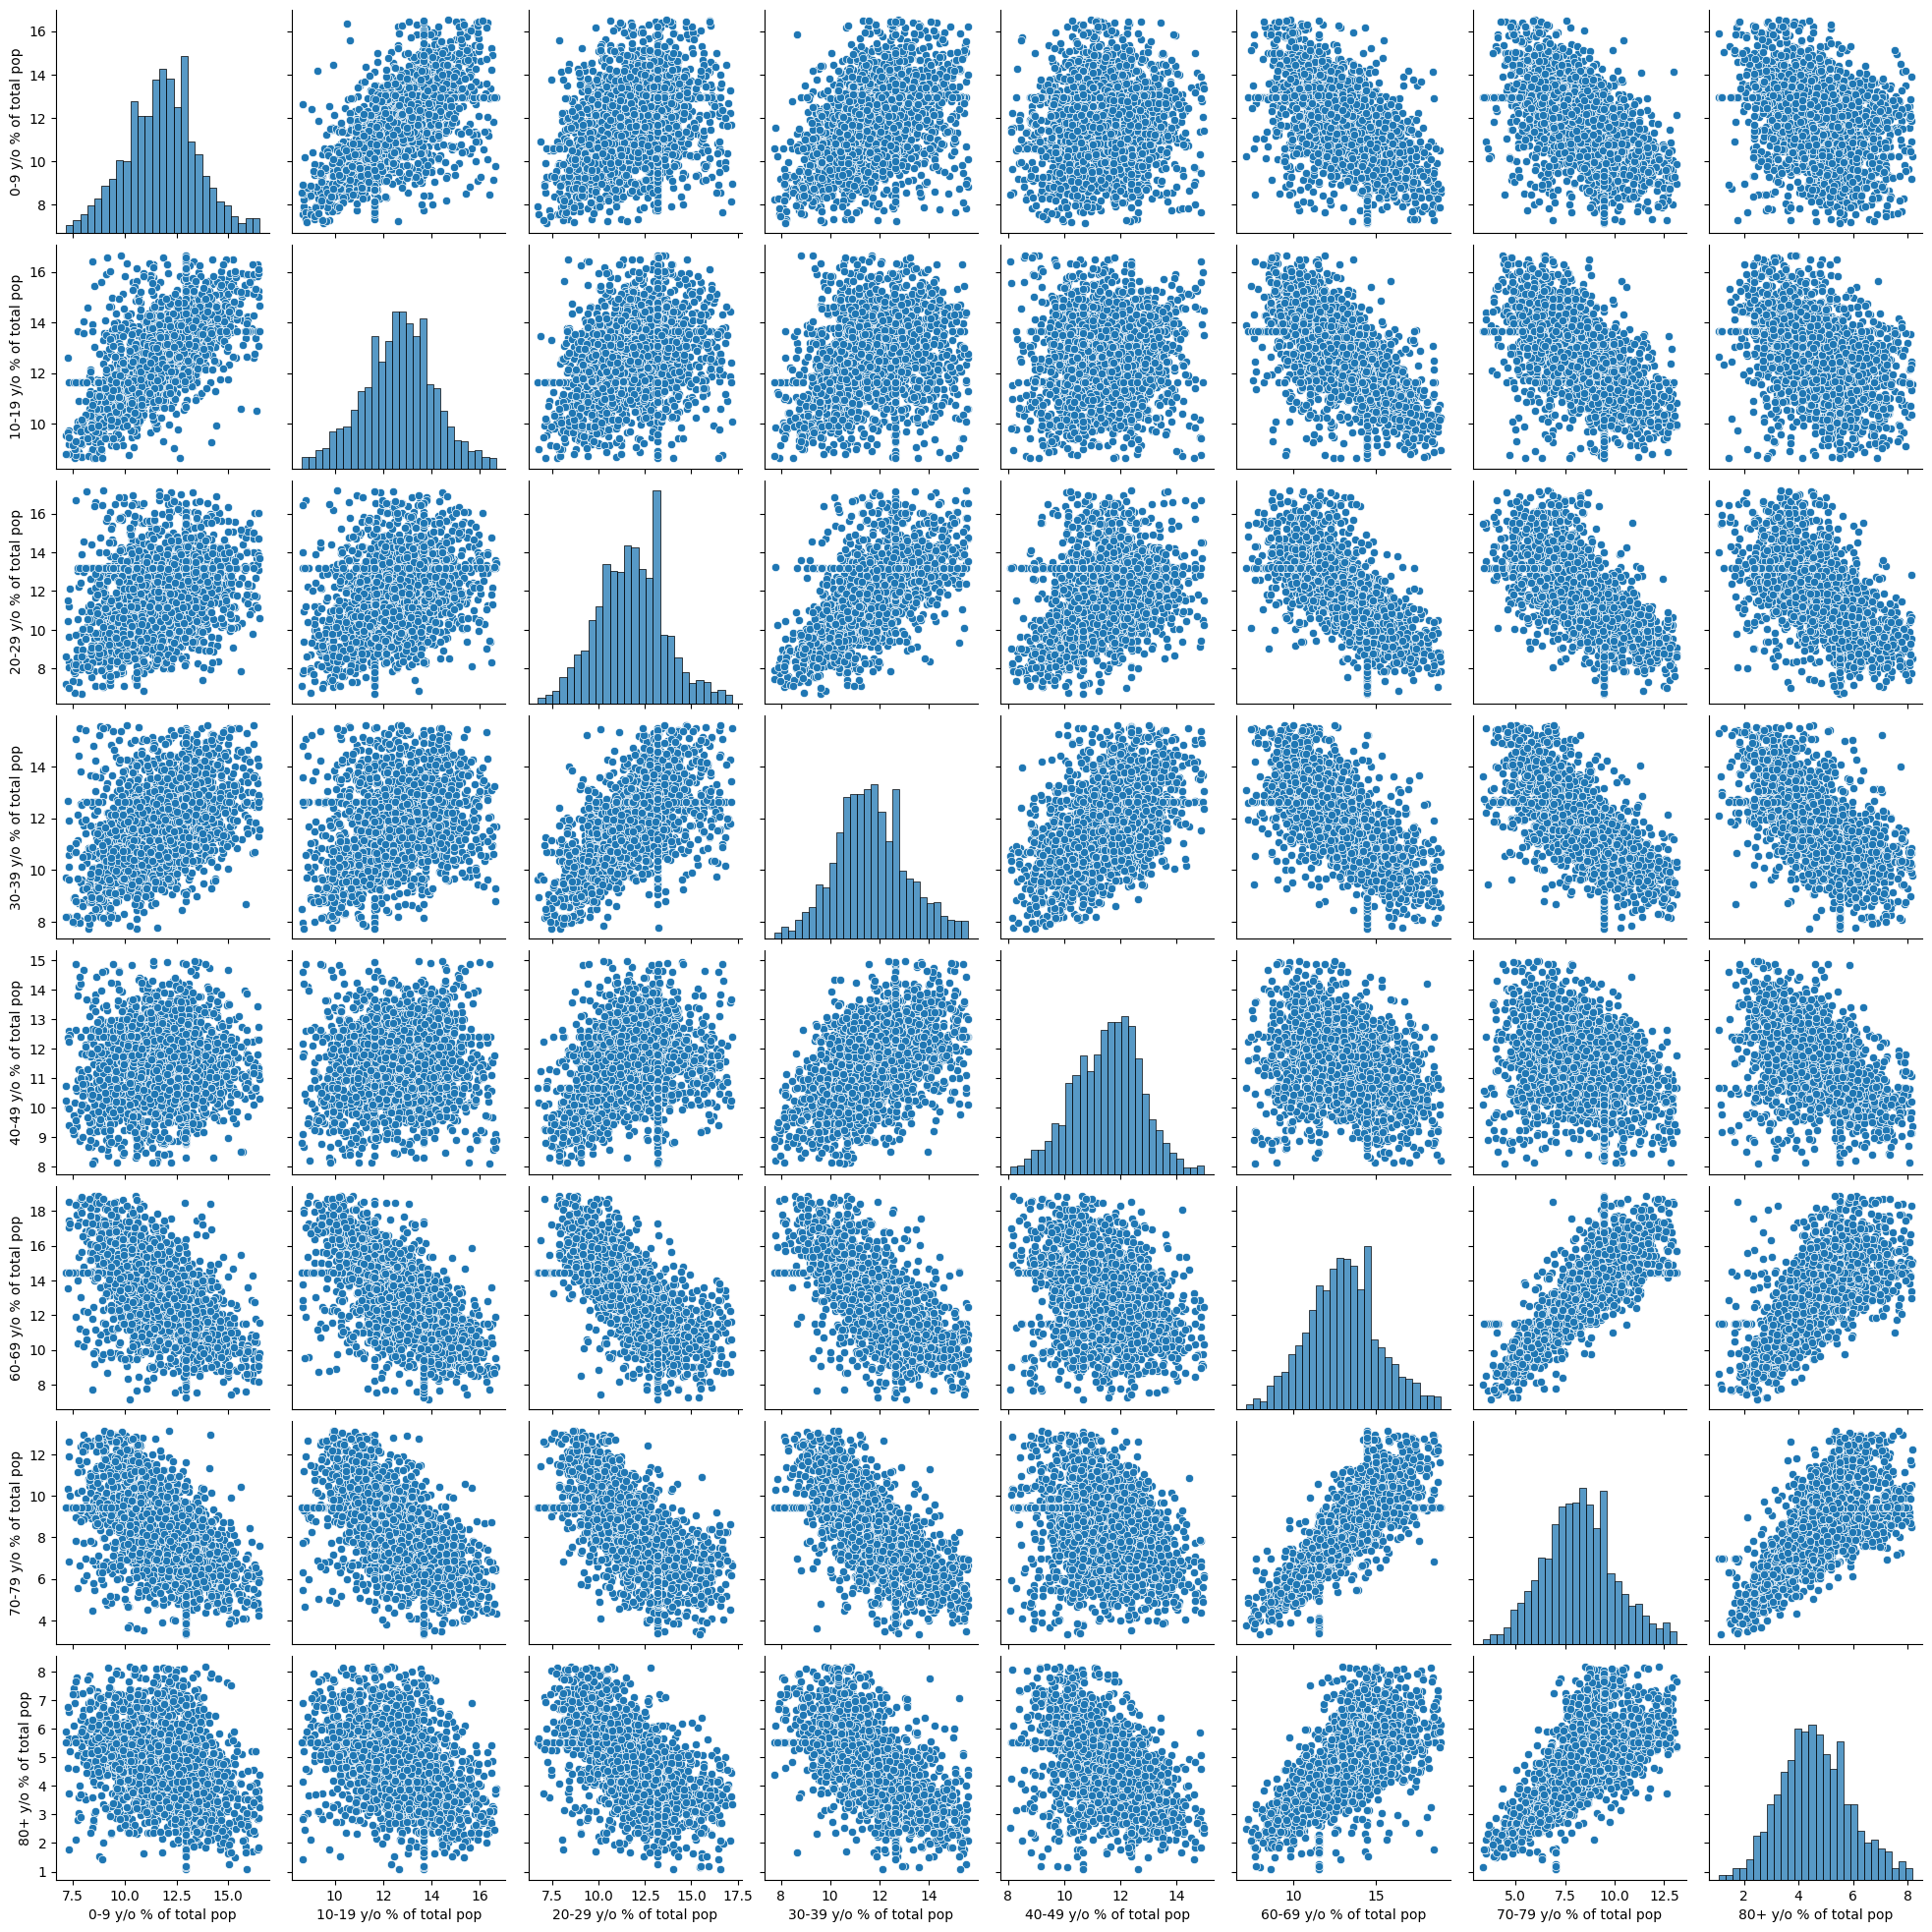

In [47]:
# Assuming 'X_train' includes only the columns of interest or creating a subset DataFrame
sns.pairplot(X_train[['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop']])
plt.show()


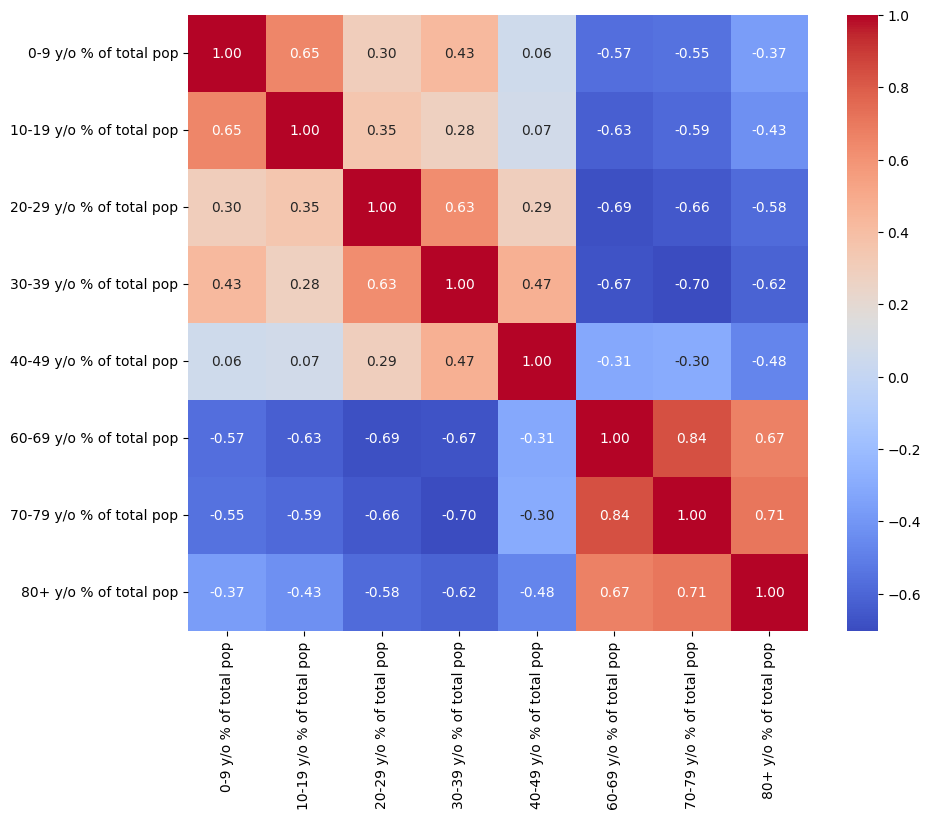

In [49]:
corr = X_train_scaled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


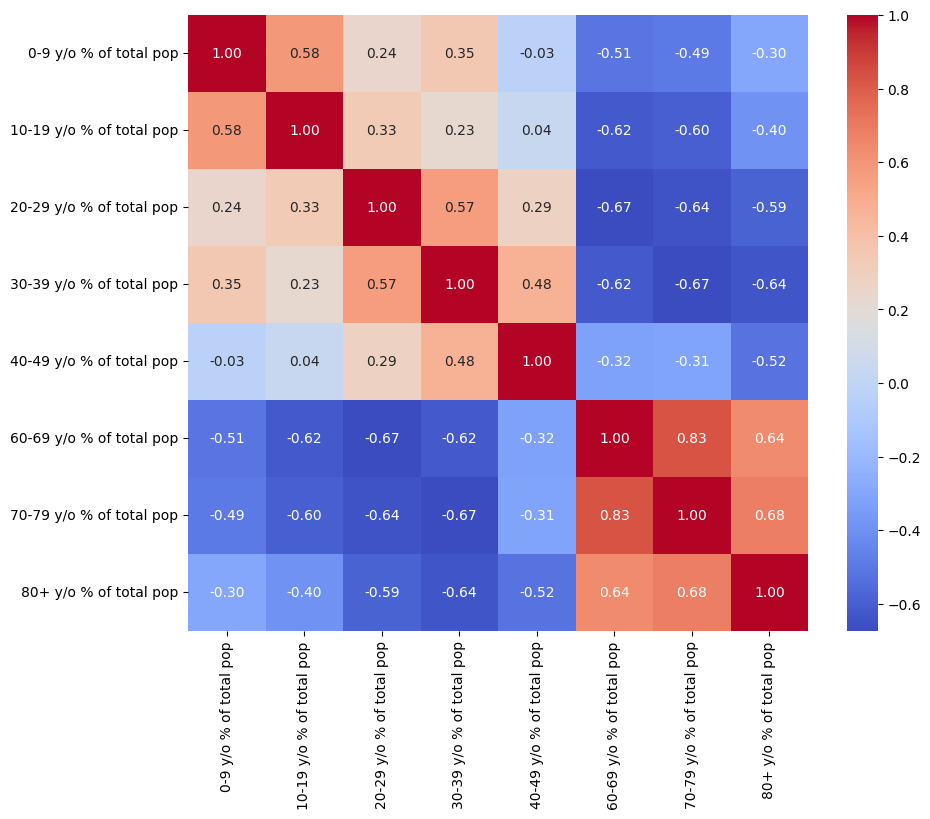

In [51]:
# Convert scaled data back to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
corr = X_test_scaled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

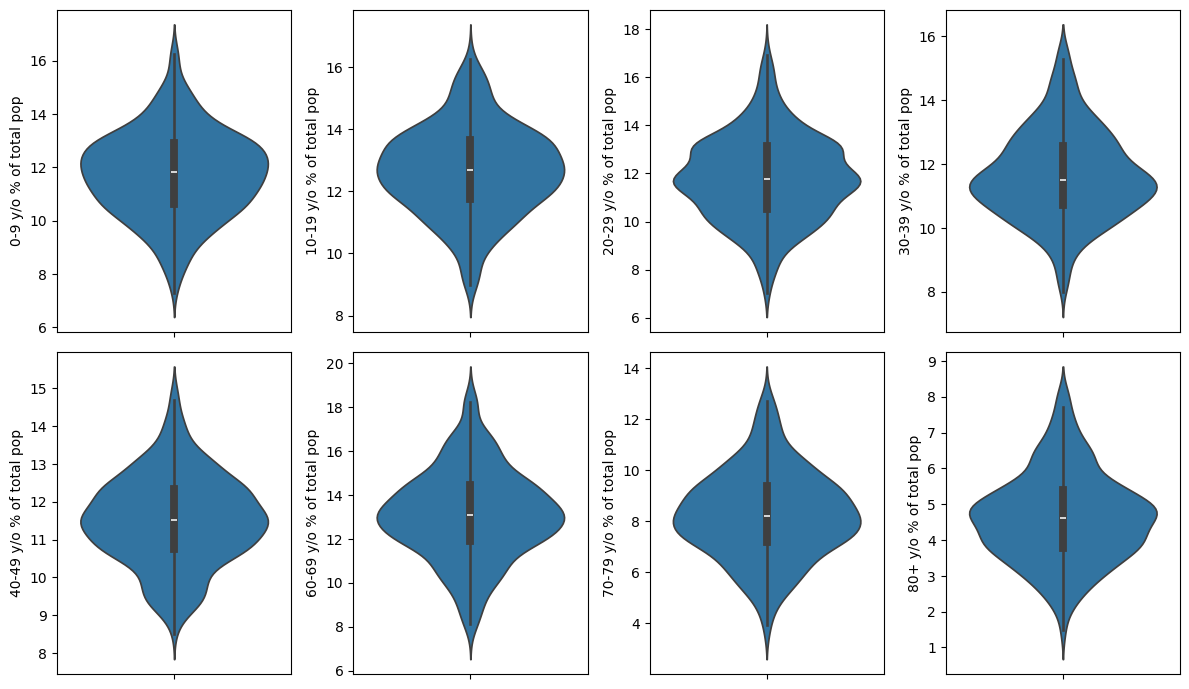

In [40]:
fig, axis = plt.subplots(2, 4, figsize=(12, 7))

# Create violin plots
sns.violinplot(ax=axis[0, 0], data=X_test, y="0-9 y/o % of total pop")
sns.violinplot(ax=axis[0, 1], data=X_test, y="10-19 y/o % of total pop")
sns.violinplot(ax=axis[0, 2], data=X_test, y="20-29 y/o % of total pop")
sns.violinplot(ax=axis[0, 3], data=X_test, y="30-39 y/o % of total pop")
sns.violinplot(ax=axis[1, 0], data=X_test, y="40-49 y/o % of total pop")
sns.violinplot(ax=axis[1, 1], data=X_test, y="60-69 y/o % of total pop")
sns.violinplot(ax=axis[1, 2], data=X_test, y="70-79 y/o % of total pop")
sns.violinplot(ax=axis[1, 3], data=X_test, y="80+ y/o % of total pop")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

In [41]:
scaler.fit(X_train)

StandardScaler()

In [42]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled


array([[-0.88446771, -1.51304682, -1.60727614, ...,  2.20807103,
         1.05951003,  2.08353322],
       [ 0.14769006, -0.11488486, -0.15458268, ..., -0.24476025,
         0.21545078,  0.47343923],
       [ 0.09688832,  1.11195127,  0.27179235, ..., -0.3047391 ,
        -0.18631106, -0.47856852],
       ...,
       [ 1.22042397,  1.53909029, -0.04647902, ..., -0.03851753,
        -0.10491574,  0.61384863],
       [ 0.86127639,  0.78920953, -1.27784831, ...,  0.65012424,
         0.21038134,  2.43853995],
       [-0.53782337, -1.28771616,  1.61964844, ..., -1.04821384,
        -0.24811188,  0.33821169]])

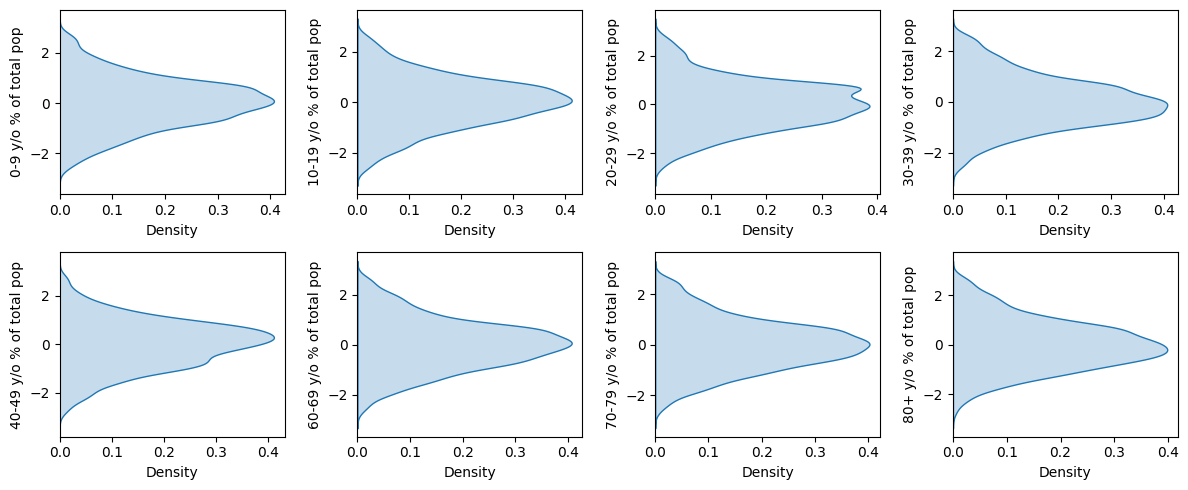

In [45]:
# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create density plots
fig, axis = plt.subplots(2, 4, figsize=(12, 5))
sns.kdeplot(ax=axis[0, 0], data=X_train_scaled_df, y="0-9 y/o % of total pop", fill=True)
sns.kdeplot(ax=axis[0, 1], data=X_train_scaled_df, y="10-19 y/o % of total pop", fill=True)
sns.kdeplot(ax=axis[0, 2], data=X_train_scaled_df, y="20-29 y/o % of total pop", fill=True)
sns.kdeplot(ax=axis[0, 3], data=X_train_scaled_df, y="30-39 y/o % of total pop", fill=True)
sns.kdeplot(ax=axis[1, 0], data=X_train_scaled_df, y="40-49 y/o % of total pop", fill=True)
sns.kdeplot(ax=axis[1, 1], data=X_train_scaled_df, y="60-69 y/o % of total pop", fill=True)
sns.kdeplot(ax=axis[1, 2], data=X_train_scaled_df, y="70-79 y/o % of total pop", fill=True)
sns.kdeplot(ax=axis[1, 3], data=X_train_scaled_df, y="80+ y/o % of total pop", fill=True)

plt.tight_layout()
plt.show()


In [60]:
#Regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [52]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lin)}")

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
print(f"Lasso Regression R^2: {r2_score(y_test, y_pred_lasso)}")


Linear Regression R^2: 0.2629218001315129
Lasso Regression R^2: 0.09895309339615777


In [58]:
#Train model
model = Lasso(alpha=1.0) 

# Train the model using the training set
model.fit(X_train_scaled, y_train)

Lasso()

In [57]:
from sklearn.metrics import mean_squared_error

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.5990242139432596
